# Transformações de sinais de tempo discreto na variável independente

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
# @title
import sympy as sym
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

## Transformações

O conceito de transformação de um sinal é extremamente importante na análise de sinais. Por exemplo, um equipamento que analisa o sinal de eletrocardiograma obtido de um paciente faz diversas transformações no sinal obtido para fornecer as informações necessárias. Outro exemplo a ser considerado é a transformação que o sistema nervoso e muscular faz ao receber os sinal neural e produzir força.

Aqui veremos diversas transformações matemáticas que um sinal pode sofrer. Essas transformações serão muito importantes para caracterizar sistemas complexos mais para frente.

### Deslocamento no tempo

Uma transformação muito importante é o deslocamento no tempo. Essa transformação acontece quando temos dois sinais de tempo discreto $x$ e $y$ com:

$$y[n] = y[n-N_d]$$



Nesse caso, o sinais $x$ e $y$ têm a mesma forma, mas $y$ está deslocado no tempo em relação a $x$ (atrasado no caso de $N_d$ ser positivo e adiantado caso seja positivo).



---

#### Exemplo 1

O sinal $x_2[n] = \cos\left(\pi \frac{n-3}{N}\right)$ é o sinal $x_1[n] = \cos\left(\pi\frac{n}{N}\right)$ atrasado de 3 instantes.

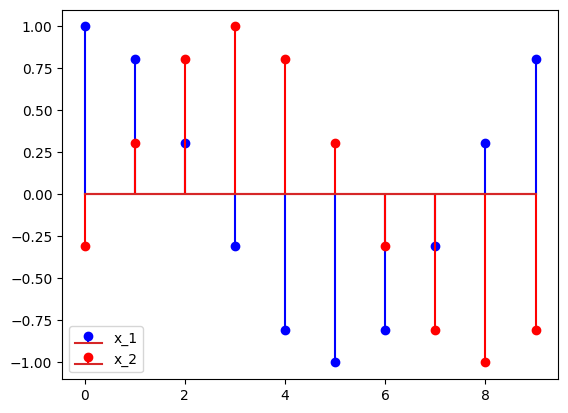

In [ ]:
# @title
n = np.arange(0, 10)
N = 5
Nd = 3
x1 = np.cos(np.pi*n/N)
x2 = np.cos(np.pi*(n-Nd)/N)
plt.stem(n, x1, linefmt='blue', label='x_1')
plt.stem(n, x2, linefmt='red', label='x_2')
plt.legend()

---

### Reflexão no tempo

A reflexão no tempo é a transformação em que um sinal aparece espelhado em relação à ordenada do gráfico.  Essa transformação irá aparecer numa operação muito importante entre sinais conhecida como convolução.  

---

#### Exemplo 2

Abaixo um exemplo de reflexão no tempo para o caso discreto. Note que $x_1[n] = x_2[-n]$.

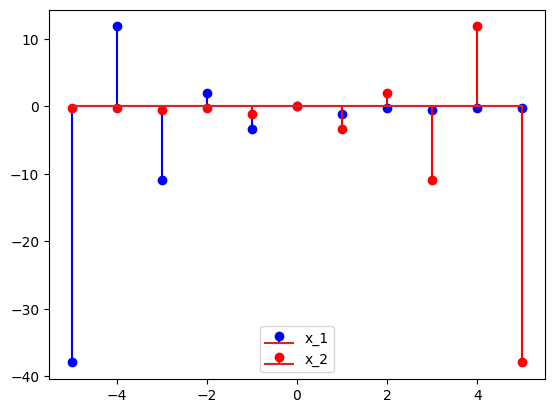

In [ ]:
# @title
n = np.arange(-5,6)
x1 = (-0.5)**n - (0.7)**n
x2 = (-0.5)**(-n) - (0.7)**(-n)
plt.stem(n, x1, linefmt='blue', label='x_1')
plt.stem(n, x2, linefmt='red', label='x_2')
plt.legend()

---

### Mudança de escala

Outra transformação importante é a mudança de escala de um sinal. Ao multiplicar o tempo por uma constante o sinal corre mais rápido (se a constante for maior do que 1) ou mais devagar (se a constante for menor do que 1).  Esse tipo de transformação é muito usado em aplicativos de mensagem, que possibilitam ouvir uma mensagem de áudio mais rapidamente.



Abaixo estão exemplos de sinais de tempo discreto em diferentes escalas. Os três sinais têm o mesmo formato, embora devido à natureza discreta dos sinais, eles não tenham exatamente os mesmos valores.

O sinal $x_2[n] = x_1[2n]$ é comprimido em relação ao $x_1[n]$. No caso de tempo discreto, essa mudança de escala com a escala maior do que 1 é chamada de subamostragem. Esse nome é usado porque o sinal perde alguns valores em relação ao sinal original. Note no gráfico que o sinal $x_2[n]$ não tem alguns valores que estão presentes no sinal $x_1[n]$.

O sinal $x_3[n] = x_1[0.5n]$ é expandido em relação ao $x_1[n]$. No caso de tempo discreto, essa mudança de escala com a escala menor do que 1 é chamada de superamostragem. Esse nome é usado porque o sinal $x_3[n]$ tem valores que não estão presentes no sinal $x_1[n]$. No gráfico abaixo é possível observar esse fenômeno.

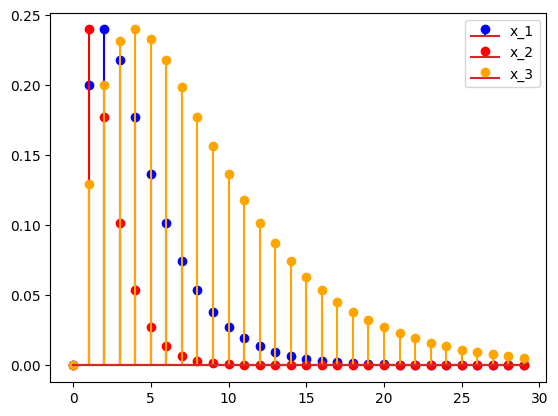

In [ ]:
# @title
n = np.arange(0,30)
x1 = (0.7)**n - (0.5)**n
x2 = (0.7)**(2*n) - (0.5)**(2*n)
x3 = (0.7)**(0.5*n) - (0.5)**(0.5*n)
plt.stem(n, x1, linefmt='blue', label='x_1')
plt.stem(n, x2, linefmt='red', label='x_2')
plt.stem(n, x3, linefmt='orange', label='x_3')
plt.legend()

## Simetria par e ímpar

Uma propriedade útil para a análise de sinais é verificar se existe alguma simetria em relação ao tempo. Então são definidas duas simetrias:

### Simetria par:

Acontece se:

$$x[n] = x[-n]$$


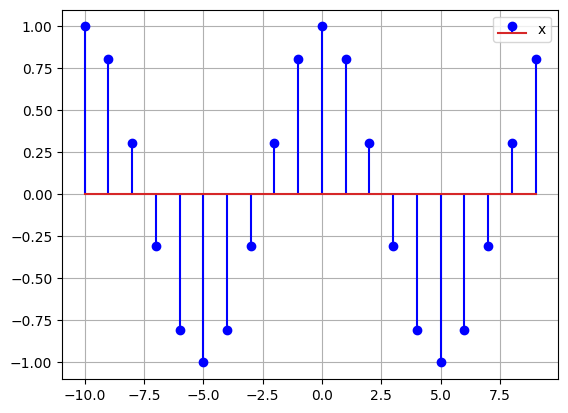

In [ ]:
# @title
n = np.arange(-10,10)
x = np.cos(0.2*np.pi*n)
plt.stem(n, x, linefmt='blue', label='x')
plt.legend()
plt.grid()


---

### Simetria ímpar

Acontece se:


$$x[n] = -x[-n]$$


Note que no caso do sinal ter simetria ímpar, $x[0] = 0$ (já que $x[0] = -x[0]$).

---

#### Exempo 5

O sinal seno, visto abaixo, tem simetria ímpar. Os instantes negativos têm os valores dos positivos com sinais trocados.

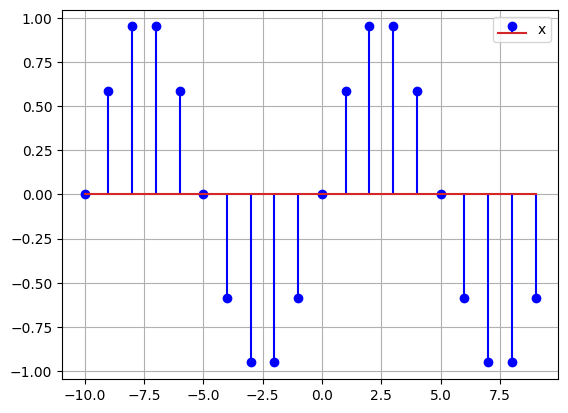

In [ ]:
# @title
n = np.arange(-10,10)
x = np.sin(0.2*np.pi*n)
plt.stem(n, x, linefmt='blue', label='x')
plt.legend()
plt.grid()


---

### Decomposição em sinais pares e ímpares

Qualquer sinal pode ser decomposto em uma parte par e uma parte ímpar. Abaixo as expressões decomposição para tempo contínuo

$Par\{x[t]\} = \frac{x[t]+x[-t]}{2}$

e

$Impar\{x[t]\} = \frac{x[t]-x[-t]}{2}$

---


#### Exemplo 6


Por exemplo, no gráfico abaixo, são mostradas as partes par e ímpar do sinal $x[n] = 0.5^{n}-0.2^{n}$. As partes par e ímpar são encontradas usando as expressões acima.

$$Par\{x[n]\} = \frac{0.5^{n}-0.2^{n}+0.5^{-n}-0.2^{-n}}{2}$$

$$Impar\{x(t)\} = \frac{0.5^{n}-0.2^{n}-0.5^{-n}+0.2^{-n}}{2}$$

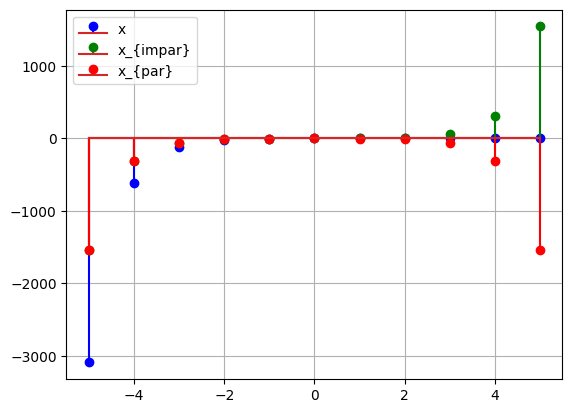

In [ ]:
# @title

n = np.arange(-5,6)
x = 0.5**n - 0.2**n
plt.stem(n, x, linefmt='blue', label='x')
xpar = (0.5**n - 0.2**n+0.5**(-n) - 0.2**(-n))/2
ximpar = (0.5**n - 0.2**n-0.5**(-n) + 0.2**(-n))/2
plt.stem(n, ximpar, linefmt='green', label='x_{impar}')
plt.stem(n, xpar, linefmt='red', label='x_{par}')

plt.legend()
plt.grid()


---

## Sinais periódicos



Um sinal de tempo discreto é periódico se existe uma constante inteira $N$ para a qual:

$x[n] = x[n+kN]$

para todo $n$ e $k$ inteiros.

---

#### Exemplo 8

Abaixo está o gráfico do sinal

$x[n] = \mathrm{sen}\left(\frac{\pi}{5}n + \frac{\pi}{4}\right)$

<StemContainer object of 3 artists>

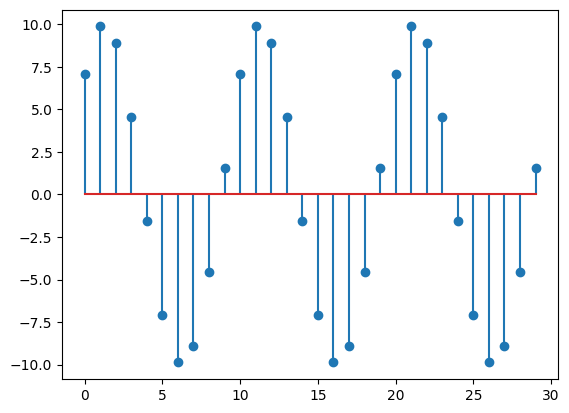

In [ ]:
# @title
n = np.arange(0, 30)
Omega = np.pi/5
theta = np.pi/4
x = 10*np.sin(Omega*n+theta)
plt.stem(n, x)

O sinal acima tem período fundamental $N_0 = 10$.

---

## Exercícios

**1)** Suponha que $x[n]$ seja um sinal com $x[n]=0$ para $n<-3$ e $n>2$. Para cada um dos sinais a seguir, determinar os valores de $n$ para os quais os sinais são zero.

a) $y_1[n] = x[n-3]$

b) $y_2[n] = x[n+4]$

c) $y_3[n] = x[-n]$

d) $y_4[n] = x[-n+2]$

e) $y_5[n] = x[-n-2]$

**4)** O sinal de tempo discreto $x[n]$ é mostrado abaixo. Para os valores de $n$ não mostrados no gráfico, o valor de $x[n]=0$. Esboce os seguintes sinais:

a) $y_1[n] = x[n-4]$

b) $y_2[n] = x[2-n]$

c) $y_3[n] = x[3n]$

d) $y_4[n] = x[3n+1]$

e) $y_5[n] = x[(n-1)^2]$

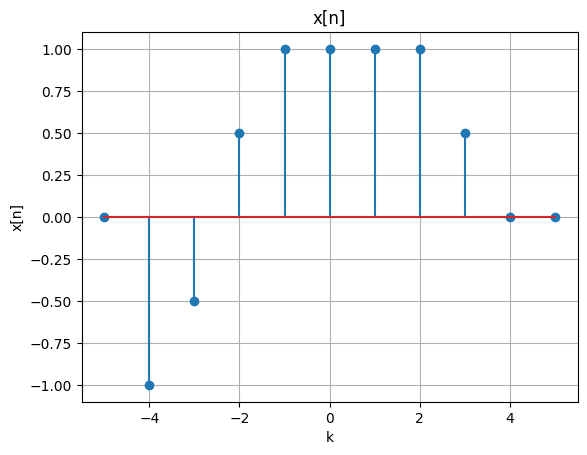

In [ ]:
# @title
k = np.arange(-5, 6)
x = [0,-1, -0.5, 0.5, 1, 1, 1, 1, 0.5, 0,0]
plt.stem(k,x)
plt.xlabel('k')
plt.title('x[n]')
plt.ylabel('x[n]')
plt.grid()

**6)** Decomponha e rascunhe os seguintes sinais nas suas partes par e ímpar:


a) $x_1[n] = \left(\frac{1}{2}\right)^n$

b) $x_2[n] = \left(\frac{1}{2}\right)^n\cos(n/10)$





## Referências

- Oppenheim, M. Sistemas e Sinais, 2010
- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Respostas dos exercícios

**1)** Resolvido por Jorge Vinicius Nascimento Lamar

**1)** a)  $y_1[n] = x[n-3]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$n-3 < -3$$
e
$$n-3 > 2$$

portanto:
$$n-3 < -3$$
$$n-3+3 < -3+3$$
$$n < 0$$

e
$$n-3 > 2$$
$$n-3+3 > 2+3$$
$$n > 5$$

logo,  *$y_1[n]=0$* para *$n<0$* e *$n>5$*

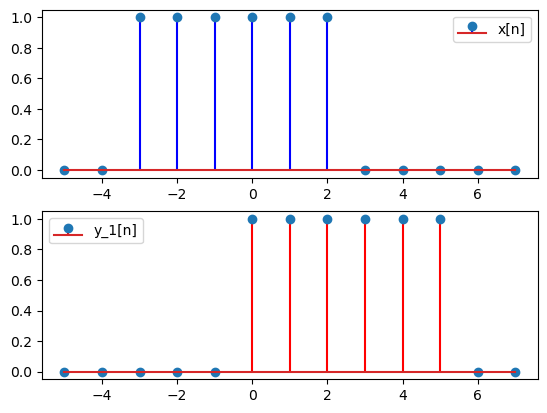

In [ ]:
n = np.arange(-5,8)

xn= [0, 0, 1, 1, 1,  1,  1,  1,  0,  0,  0,  0, 0]
y1= [0, 0, 0, 0, 0,  1,  1,  1,  1,  1,  1,  0, 0]

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** b) $y_2[n] = x[n+4]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$n+4 < -3$$
e
$$n+4 > 2$$

portanto:
$$n+4 < -3$$
$$n+4-4 < -3-4$$
$$n < -7$$

e
$$n+4 > 2$$
$$n+4-4 > 2-4$$
$$n > -2$$

logo,  *$y_2[n]=0$* para *$n<-7$* e *$n>-2$*

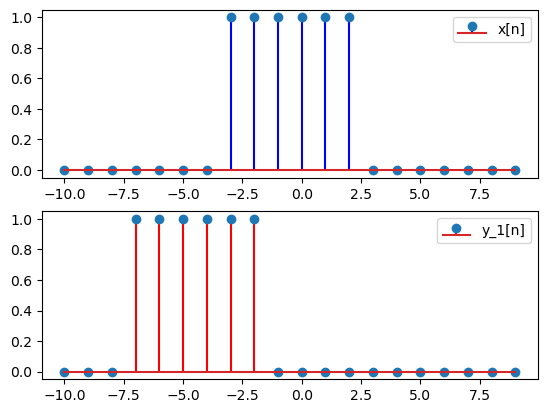

In [ ]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[3:9]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** c) $y_3[n] = x[-n]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$-n < -3$$
e
$$-n > 2$$

portanto:
$$-n < -3$$
$$n > 3$$

e
$$-n > 2$$
$$n < -2$$


logo,  *$y_2[n]=0$* para *$n<-2$* e *$n>3$*

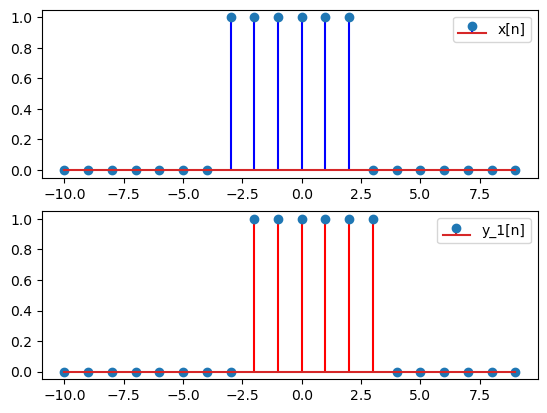

In [ ]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[8:14]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** d) $y_4[n] = x[-n+2]$

Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$-n+2 < -3$$
e
$$-n+2 > 2$$

portanto:
$$-n+2 < -3$$
$$-n+2-2 < -3-2$$
$$-n < -5$$
$$n > 5$$
e
$$-n+2 > 2$$
$$-n+2-2 > 2-2$$
$$-n > 0$$
$$n < 0$$

logo,  *$y_2[n]=0$* para *$n<0$* e *$n>5$*

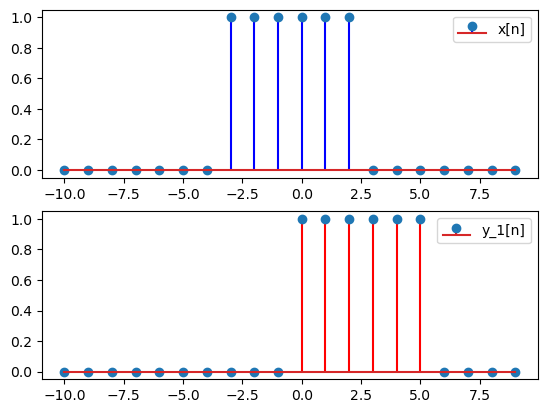

In [ ]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[10:16]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**1)** e) $y_5[n] = x[-n-2]$
Sabendo que $x[n] = 0$ para $n<-3$ e $n>2$

É possivel determinar $y_1[n]=0$ fazendo:

$$-n-2 < -3$$
e
$$-n-2 > 2$$

portanto:
$$-n-2 < -3$$
$$-n-2+2 < -3+2$$
$$-n < -1$$
$$n > 1$$
e
$$-n-2 > 2$$
$$-n-2+2 > 2+2$$
$$-n > 4$$
$$n < -4$$

logo,  *$y_2[n]=0$* para *$n<-4$* e *$n>1$*

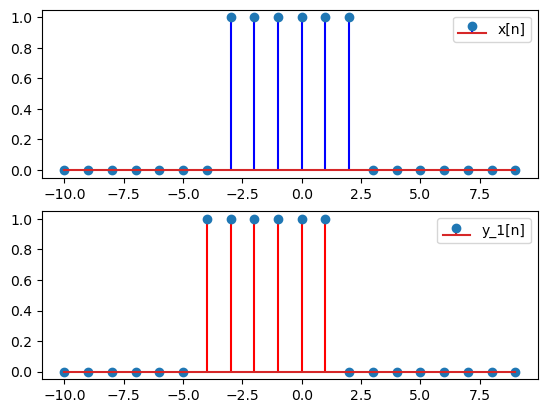

In [ ]:
n = np.arange(-10,10)

xn= np.zeros(len(n))
xn[7:13]=1
y1= np.zeros(len(n))
y1[6:12]=1

plt.subplot(2, 1, 1)
plt.stem(n, xn, linefmt='blue', label='x[n]')
plt.legend()
plt.subplot(2, 1, 2)
plt.stem(n, y1, linefmt='red', label='y_1[n]')
plt.legend()

**2)** Resolvido por Frederico Ercolin Guazzelli
**2)** a) $y_1(t) = x(1-t)$

Substituindo $x(t)$ em $y_1(t)$


$y_1(t) = x(1-t) = 0$ para t > 5

Neste caso, $y_1(t)$ será igual a zero quando $1 - t > 5$.

Resolvendo para t:
$$1 - t > 5$$
$$ -t > 5-1$$
$$-t > 4$$
portanto,
$$t < -4$$

logo,  *$y_1(t)$* será igual a zero quando *$t < -4$*.

**2)** b) $y_2(t) = x(-t)$

Substituindo $x(t)$ em $y_2(t)$


$y_2(t) = x(-t) = 0$ para t > 5

Neste caso, $y_2(t)$ será igual a zero quando $ - t > 5$.

Resolvendo para t:
$$ - t > 5$$
$$ t < -5$$

portanto,
$$t < -5$$

logo,  *$y_2(t)$* será igual a zero quando *$t < -5$*.


**2)** c) $y_3(t) = x\left(\frac{t}{2}\right)$

Substituindo $x(t)$ em $y_3(t)$


$y_3(t) = x\left(\frac{t}{2}\right) = 0$ para t > 5

Neste caso, $y_3(t)$ será igual a zero quando $ \frac{t}{2} > 5$.

Resolvendo para t:
$$ \frac{t}{2} > 5$$
$$ t > 5*2$$

portanto,
$$t < 10$$

logo,  *$y_3(t)$* será igual a zero quando *$t > 10$*.

**2)** d) $y_4(t) = x(6t)$

Substituindo $x(t)$ em $y_4(t)$


$y_4(t) = x(6t) = 0$ para t > 5

Neste caso, $y_4(t)$ será igual a zero quando $ 6t > 5$.

Resolvendo para t:
$$ 6t > 5$$

portanto,
$$t > \frac{5}{6}$$

logo,  *$y_4(t)$* será igual a zero quando *$t > \frac{5}{6} $*.

**3)** Resolvido por Rafaela Farto de Camargo Fernandes

a) $y_1(t) = x(t-3)$

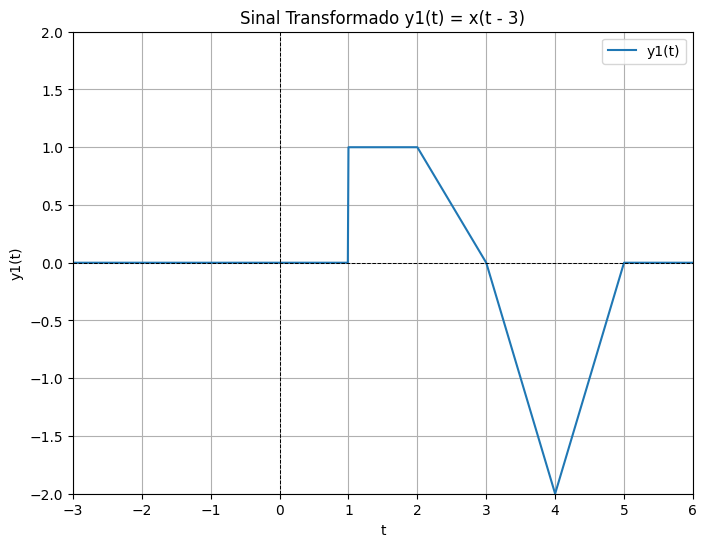

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo de tempo para o gráfico
t = np.linspace(-3, 6, 1000)  # Intervalo de -3 a 6

# Defina o sinal original y(t).
def y(t):
    if -2 <= t < -1:
        return 1
    elif -1 <= t < 0:
        return -t
    elif 0 <= t < 1:
        return -2 * t
    elif 1 <= t < 2:
        return 2 * t - 4
    else:
        return 0

# Defina o sinal transformado y1(t) = x(t - 3)
def y1(t):
    return y(t - 3)

# Calcule os valores de y1(t) para o intervalo de tempo especificado
y1_values = [y1(ti) for ti in t]

# Crie o gráfico
plt.figure(figsize=(8, 6))
plt.plot(t, y1_values, label='y1(t)')
plt.title('Sinal Transformado y1(t) = x(t - 3)')
plt.xlabel('t')
plt.ylabel('y1(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.axvline(0, color='black', linewidth=0.7, linestyle='--')
plt.xlim(-3, 6)
plt.ylim(-2, 2)
plt.legend()
plt.show()


b) $y_2(t) = x(1-t)$

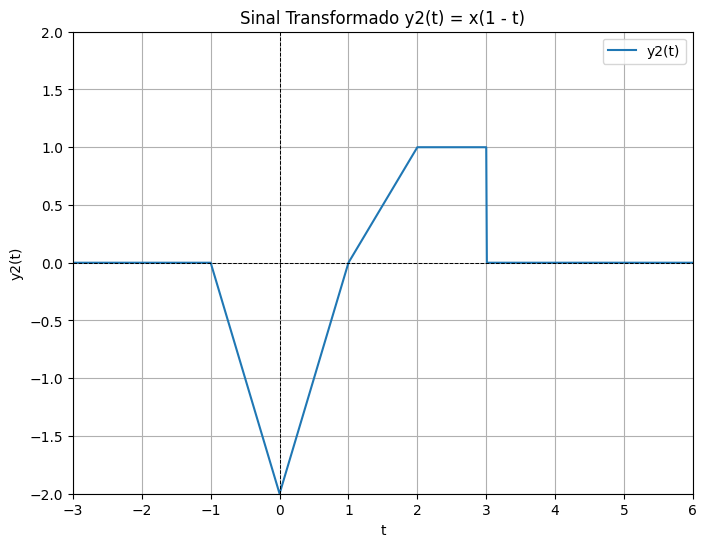

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo de tempo para o gráfico
t = np.linspace(-3, 6, 1000)  # Intervalo de -3 a 6

# Defina o sinal original y(t).
def y(t):
    if -2 <= t < -1:
        return 1
    elif -1 <= t < 0:
        return -t
    elif 0 <= t < 1:
        return -2 * t
    elif 1 <= t < 2:
        return 2 * t - 4
    else:
        return 0

# Defina o sinal transformado y2(t) = x(1 - t)
def y2(t):
    return y(1 - t)

# Calcule os valores de y2(t) para o intervalo de tempo especificado
y2_values = [y2(ti) for ti in t]

# Crie o gráfico
plt.figure(figsize=(8, 6))
plt.plot(t, y2_values, label='y2(t)')
plt.title('Sinal Transformado y2(t) = x(1 - t)')
plt.xlabel('t')
plt.ylabel('y2(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.axvline(0, color='black', linewidth=0.7, linestyle='--')
plt.xlim(-3, 6)
plt.ylim(-2, 2)
plt.legend()
plt.show()



c) $y_3(t) = x(2-\frac{t}{3})$

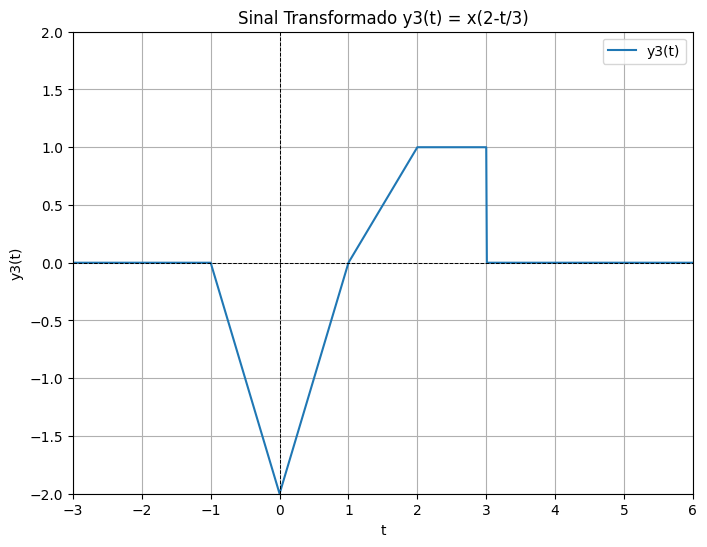

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo de tempo para o gráfico
t = np.linspace(-3, 6, 1000)  # Intervalo de -3 a 6

# Defina o sinal original y(t).
def y(t):
    if -2 <= t < -1:
        return 1
    elif -1 <= t < 0:
        return -t
    elif 0 <= t < 1:
        return -2 * t
    elif 1 <= t < 2:
        return 2 * t - 4
    else:
        return 0

# Defina o sinal transformado y3(t) = x(2-t/3)
def y3(t):
    return y(2-t/3)

# Calcule os valores de y2(t) para o intervalo de tempo especificado
y3_values = [y3(ti) for ti in t]

# Crie o gráfico
plt.figure(figsize=(8, 6))
plt.plot(t, y2_values, label='y3(t)')
plt.title('Sinal Transformado y3(t) = x(2-t/3)')
plt.xlabel('t')
plt.ylabel('y3(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.axvline(0, color='black', linewidth=0.7, linestyle='--')
plt.xlim(-3, 6)
plt.ylim(-2, 2)
plt.legend()
plt.show()


**5)** Resolvido por Juliana Soares da Silva de Oliveira

a)
$x_1(-t) = \mathrm{sen}(2(-t))\cos(2(-t)) = -\mathrm{sen}(2t)\cos(2t) = -x_1(t) ≠ x_1(t)$

Como $x_1(-t) = -x_1(t)$, podemos concluir que o sinal $x_1(t)$ é ímpar.

b)
$x_2(-t) = \mathrm{sen}((-t)^2) = \mathrm{sen}(t^2) = x_2(t)$

Como $x_2(-t) = x_2(t)$, podemos concluir que o sinal $x_2(t)$ é par.

**6)** Resolvido por Frederico Ercolin Guazzelli

Parte par definida como:

$ x_p(t) = \frac{1}{2}[x(t)+x(-t)] $ e $ x_p[n] = \frac{1}{2}(x[t]+x[-t]) $

Parte ímpar definida como:

$ x_i(t) = \frac{1}{2}[x(t)-x(-t)] $ e $ x_i[n] = \frac{1}{2}(x[t]-x[-t]) $

 a) $x_1(t) = \mathrm{sen}(\omega_0t)$

Parte par:
$$ x_{1p}(t) = \frac{1}{2}[\mathrm{sen}(\omega_0t) + \mathrm{sen}(-\omega_0t)] = \frac{1}{2}[\mathrm{sen}(\omega_0t) - \mathrm{sen}(\omega_0t)] = 0$$

Parte ímpar:
$$ x_{1i}(t) = \frac{1}{2}[\mathrm{sen}(\omega_0t) - \mathrm{sen}(-\omega_0t)] = \frac{1}{2}[\mathrm{sen}(\omega_0t) + \mathrm{sen}(\omega_0t)] = \mathrm{sen}(\omega_0t) $$

b) $x_2(t) = \cos(\omega_0t)$

Parte par:
$$ x_{2p}(t) = \frac{1}{2}[\cos(\omega_0t) + \cos(-\omega_0t)] = \frac{1}{2}[\cos(\omega_0t) + \cos(\omega_0t)] = \cos(\omega_0t)$$

Parte ímpar:
$$ x_{2i}(t) = \frac{1}{2}[\cos(\omega_0t) - \cos(-\omega_0t)] = \frac{1}{2}[\cos(\omega_0t) - \cos(\omega_0t)] = 0 $$

c) $x_3(t) = \cos(\omega_0t+\theta)$

Parte par:
$$ x_{3p}(t) = \frac{1}{2}[\cos(\omega_0t+\theta) + \cos(-\omega_0t-\theta)] = \frac{1}{2}[\cos(\omega_0t+\theta) + \cos(\omega_0t+\theta)] = \cos(\omega_0t+\theta)$$

Parte ímpar:
$$ x_{3i}(t) \frac{1}{2}[\cos(\omega_0t+\theta) - \cos(-\omega_0t-\theta)] = \frac{1}{2}[\cos(\omega_0t+\theta) - \cos(\omega_0t+\theta)] = 0 $$

d) $x_4[n] = \left(\frac{1}{2}\right)^n$

Parte par:
$$ x_{4p}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n + \left(\frac{1}{2}\right)^{-n}] = \frac{1}{2}(2^{n-n})= \frac{1}{2}$$

Parte ímpar:
$$ x_{4i}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n - \left(\frac{1}{2}\right)^{-n}] = \frac{1}{2}(2^{n-n}-2^{-n+n})= \frac{1}{2}(1 - 2^{-2n})$$

e) $x_5[n] = \left(\frac{1}{2}\right)^n\cos(n/10)$

Parte par:
$$ x_{5p}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n\cos(n/10) + \left(\frac{1}{2}\right)^{-n}\cos(-n/10)] = \frac{1}{2}(2^{n-n}\cos(n/10)+ 2^{-n+n}\cos(-n/10))= \frac{1}{2}(\cos(n/10)+\cos(n/10)) = \cos(n/10)$$

Parte ímpar:
$$ x_{5i}[n] = \frac{1}{2}[\left(\frac{1}{2}\right)^n\cos(n/10) - \left(\frac{1}{2}\right)^{-n}\cos(-n/10)] = \frac{1}{2}(2^{n-n}\cos(n/10)- 2^{-n+n}\cos(-n/10))= \frac{1}{2}(\cos(n/10)-\cos(n/10)) = 0$$

**8)** Resolvido por Juliana Soares da Silva de Oliveira


$\mathrm{sen}(at) = \frac{2π}{a}$

$\mathrm{sen}(2t) = \frac{2π}{2} = π$

Portanto, o período fundamental do sinal $x(t) = sen(2t)$ é $π$. Isso significa que a função se repete a cada $π$ unidades de tempo.